<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1519]:
import pandas as pd
import psycopg2

In [ ]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [1520]:
connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [1464]:
query_3_1 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_v /* считаем количество вакансий в нашей базе и задаём ей алиас cnt_v*/
                FROM public.VACANCIES /*из таблицы public.VACANCIES*/
'''

In [1465]:
df_vacancies = pd.read_sql_query(query_3_1, connection)
df_vacancies

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_v
0,49197


In [96]:
df_vacancies.head()

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [1347]:
query_3_2 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_employers /* считаем количество работодателей и задаём ей алиас cnt_employers*/
                FROM public.EMPLOYERS /*из таблицы public.EMPLOYERS*/
'''

In [1348]:
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [1349]:
query_3_3 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_areas /* считаем количество регионов и задаём ей алиас cnt_areas*/
                FROM public.AREAS /*из таблицы public.AREAS*/
'''

In [1350]:
df_areas = pd.read_sql_query(query_3_3, connection)
df_areas

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [1466]:
query_3_4 = f''' SELECT /*выбор столбцов*/
                COUNT(id)  cnt_ind /* считаем количество сфер деятельности в базе и задаём ей алиас cnt_ind*/
                FROM public.INDUSTRIES /*из таблицы public.INDUSTRIES*/
'''

In [1468]:
df_areas = pd.read_sql_query(query_3_4, connection)
df_areas

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_ind
0,294


***

*Предварительный анализ показывает, что мы имеем дело с большим количеством данных состоящих из 5ти таблиц. При этом количество вакансий составляет 49197, а количество работодателей 23501, что указывает что каждый работодатель в среднем предлагает 2 вакансии. Дополнительно можно отметить, что количество сфер деятельности составляет 294, а количество регионов 1362*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [1469]:
query_4_1 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                a.name area, /*выбираем столбец по регионам (area) и присвоиваем алиас area*/
                COUNT(v.id) cnt_v /* считаем количество вакансий в каждом регионе (area) и задаём ей алиас cnt_v*/
                FROM public.VACANCIES v /*из таблицы public.INDUSTRIES*/
                JOIN public.AREAS a on a.id = v.area_id /*присоединяем таблицу public.areas с помощью оператора JOIN*/
                GROUP by 1 /*группируем по столбцу 1(area)*/
                ORDER by 2 desc /*сортировка по убыванию по столбцу cnt_v*/
'''

In [1470]:
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1.loc[0:4]

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt_v
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [1332]:
query_4_2 = f''' SELECT /*выбор столбцов*/
                COUNT(v.name) cnt_v /* считаем количество вакансий и задаём ей алиас cnt_v*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE salary_from IS NOT null or
                salary_to IS NOT null /*при условии, что заполнено хотя бы одно из двух полей salary_from или salary_to.*/

'''

In [1333]:
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_v
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [1471]:
query_4_3 = f''' SELECT /*выбор столбцов*/
                ROUND(AVG(v.salary_from)) salary_from_avg, /* считаем нижнию границу зарплатной вилки и задаём ей алиас salary_from_avg*/
                ROUND(AVG(v.salary_to)) salary_to_avg /* считаем верхнюю границу зарплатной вилки и задаём ей алиас salary_to_avg*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/

'''

In [1472]:
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salary_from_avg,salary_to_avg
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [1473]:
query_4_4 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                v.schedule, /*выбираем столбец типа рабочего графика (schedule)*/
                v.employment,  /*выбираем столбец типа рабочего графика (schedule)*/
                COUNT(*) cnt_v /* считаем количество вакансий и задаём ей алиас cnt_v*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                GROUP by 1, 2 /*группируем по столбцу 1(schedule) и столбцу 2(employment)*/
                ORDER by 3 desc /*сортировка по убыванию по столбцу cnt_v*/

'''

In [1474]:
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,cnt_v
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [1475]:
query_4_5 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                v.experience, /*выбираем столбец Требуемый опыт работы (experience)*/
                COUNT(*) cnt /* считаем количество вакансий и задаём ей алиас cnt*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE v.experience is not null /*при условии, что заполнено поле experience*/
                GROUP by 1 /*группируем по столбцу 1(experience)*/
                ORDER by 2 asc /*сортировка по возрастанию по столбцу cnt*/

'''

In [1476]:
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

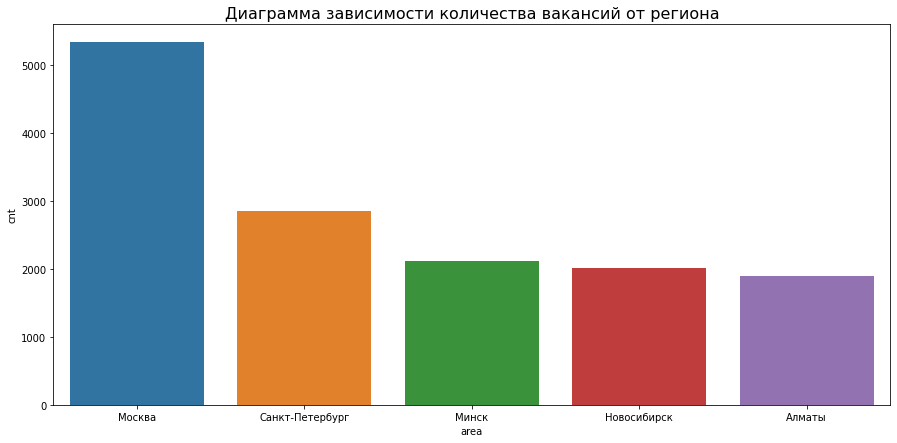

In [95]:
import seaborn as sns

grouped_data = df_4_1.loc[0:4]

fig = plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    data=grouped_data,
    x='area',
    y='cnt'    
)
barplot.set_title('Диаграмма зависимости количества вакансий от региона', fontsize=16);

*Датальный анализ и столбчатая диаграмма показывает, что большая часть вакансий предлагается в городе Москва, и их количество примерно в 2 раза большем чем в других городах милионниках. Также хотелось бы отметить что среднее значение минимальной и максимальной заработной платы 71065руб. и 110537руб., соответственно. Дополнительно хотел бы обратить внимание, что наиболее популярные комбинации рабочего графика и типа трудоустройства: Полный день-Полная занятость и Удаленная работа-Полная занятость. А соотношение предлагаемых вакансий для соискателей с опытом работы от 1 до 3х лет, к соискателям с опытом работы более 6 лет, составляем примерно 1/20, что указывает на большой спрос среди специалистов с малым опытом работы.*	

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [1477]:
query_5_1 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                e.name EMPLOYERS, /*выбираем столбец работодатели и присвоиваем алиас EMPLOYERS*/
                COUNT(v.id) cnt /* считаем количество вакансий и задаём ей алиас cnt*/
                FROM public.EMPLOYERS e /*из таблицы public.EMPLOYERS*/
                JOIN public.VACANCIES v on e.id = v.employer_id /*присоединяем таблицу public.VACANCIES с помощью оператора JOIN*/
                GROUP by 1 /*группируем по столбцу 1(EMPLOYERS)*/
                ORDER by 2 desc /*сортировка по убыванию по столбцу cnt*/
                LIMIT 5 /*устанавливаем ограничение по выводу 5ти позиций*/
'''

In [1478]:
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [1479]:
query_5_2 = f''' SELECT /*выбор столбцов*/
                a.name area,  /*выбираем столбец с названиями регионов  и присвоиваем алиас area*/
                COUNT(e.area) employers_cnt, /* считаем количество работодателей и задаём ей алиас employers_cnt*/
                COUNT(distinct v.id) vacancies_cnt /* считаем количество вакансий и задаём ей алиас vacancies_cnt*/
                FROM public.AREAS a /*из таблицы public.AREAS*/
                LEFT join public.VACANCIES v on a.id = v.area_id /*присоединяем таблицу public.VACANCIES с помощью оператора LEFT JOIN*/
                LEFT join public.employers e on a.id = e.area /*присоединяем таблицу public.employers с помощью оператора LEFT JOIN*/
                WHERE v.id IS NULL /*при условии отсутствия вакансий в регионе*/
                GROUP by a.id /*группируем по столбцу a.id*/
                ORDER by 2 desc NULLS FIRST /*сортировка по убыванию по столбцу employers_cnt, выводим первоначально пустые значения*/
'''

In [1480]:
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [1481]:
query_5_3 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                e.name EMPLOYERS, /*выбираем столбец работодатели и присвоиваем алиас EMPLOYERS*/
                COUNT(distinct v.area_id) area_cnt /* считаем количество регионов и задаём ей алиас area_cnt*/
                FROM public.EMPLOYERS e /*из таблицы public.EMPLOYERS*/
                JOIN public.VACANCIES v on e.id = v.employer_id /*присоединяем таблицу public.VACANCIES с помощью оператора JOIN*/
                GROUP by 1 /*группируем по столбцу EMPLOYERS*/
                ORDER by 2 desc /*сортировка по убыванию по столбцу area_cnt*/
'''

In [1482]:
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,Яроцкий Е. В./ MoonX,1
14762,Ясли-сад №374 г. Минска,1
14763,ЯСП,1
14764,Ястро-Переработка,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [1483]:
query_5_4 = f''' SELECT /*выбор столбцов*/
                COUNT(e.id)  EMPLOYERS_cnt_industry_is_null /* считаем количество работодателей и задаём ей алиас EMPLOYERS_cnt_industry_is_null*/
                FROM public.EMPLOYERS e /*из таблицы public.EMPLOYERS*/
                FULL JOIN public.EMPLOYERS_INDUSTRIES i on e.id = i.employer_id /*присоединяем таблицу public.EMPLOYERS_INDUSTRIES с помощью оператора FULL JOIN*/
                WHERE industry_id is null /*при условии отсутствия данных о сфере деятельности */
'''

In [1485]:
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers_cnt_industry_is_null
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [1486]:
query_5_5 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                e.name EMPLOYERS /*выбираем столбец работодатели и присвоиваем алиас EMPLOYERS*/
                FROM public.EMPLOYERS e /*из таблицы public.EMPLOYERS*/
                JOIN public.EMPLOYERS_INDUSTRIES i on e.id = i.employer_id /*присоединяем таблицу public.EMPLOYERS_INDUSTRIES с помощью оператора JOIN*/
                GROUP by 1 /*группируем по столбцу EMPLOYERS*/
                HAVING count(i.industry_id) = 4 /*фильтруем по указаным четырем сферам деятельности*/
                ORDER by 1 asc /*сортировка по возрастанию по столбцу EMPLOYERS*/
                OFFSET 2 /*смещаем вывод информации на 2 позиции*/
                LIMIT 1 /*устанавливаем ограничение по выводу 1 позиции*/
'''

In [1487]:
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employers
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [374]:
query_5_6 = f''' SELECT /*выбор столбцов*/
                COUNT(e.id) cnt_em  /* считаем количество работодателей и задаём ей алиас cnt_em*/
                FROM public.EMPLOYERS_INDUSTRIES ei /*из таблицы public.EMPLOYERS_INDUSTRIES*/
                JOIN public.EMPLOYERS e  on e.id = ei.employer_id /*присоединяем таблицу public.EMPLOYERS с помощью оператора JOIN*/
                JOIN public.INDUSTRIES i on i.id = ei.industry_id /*присоединяем таблицу public.INDUSTRIES с помощью оператора JOIN*/
                WHERE i.name= 'Разработка программного обеспечения' /*при условии, что в качестве сферы деятельности указана Разработка программного обеспечения.*/
               
'''

In [375]:
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [623]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser')
# Применяем метод find() к объекту и выводим результат на экран
millionth_cities = page.find('table', class_='standard').find_all('a')
#print(len(millionth_cities))
#print(millionth_cities)
millionth_cities = [link.text for link in millionth_cities[4:]]
millionth_cities.remove('[a]')
print(millionth_cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград']


In [749]:
query_5_7 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                a.name area, /*выбираем столбец название регионов и присвоиваем алиас area*/
                COUNT(v.id) cnt /* считаем количество вакансий и задаём ей алиас cnt*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                JOIN public.areas a on a.id = v.area_id /*присоединяем таблицу public.areas с помощью оператора JOIN*/
                JOIN public.employers e on e.id = v.employer_id /*присоединяем таблицу public.EMPLOYERS с помощью оператора JOIN*/
                WHERE e.name = 'Яндекс' /*при условии, что выборка делается для компании «Яндекс»*/
                GROUP by 1 /*группируем по столбцу area*/
                ORDER by 2 desc /*сортируем по возрастанию по столбцу cnt*/
'''

In [750]:
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7['area'] = df_5_7['area'].apply(lambda x: x if x in millionth_cities else np.nan)
df_5_7 = df_5_7.dropna(how='any', axis=0)
grouped_data = df_5_7.copy()
df_5_7.loc[len(df_5_7.index)] = ['Total', df_5_7['cnt'].sum()]
df_5_7

,area,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
8,Самара,26
9,Уфа,26
10,Казань,25


***

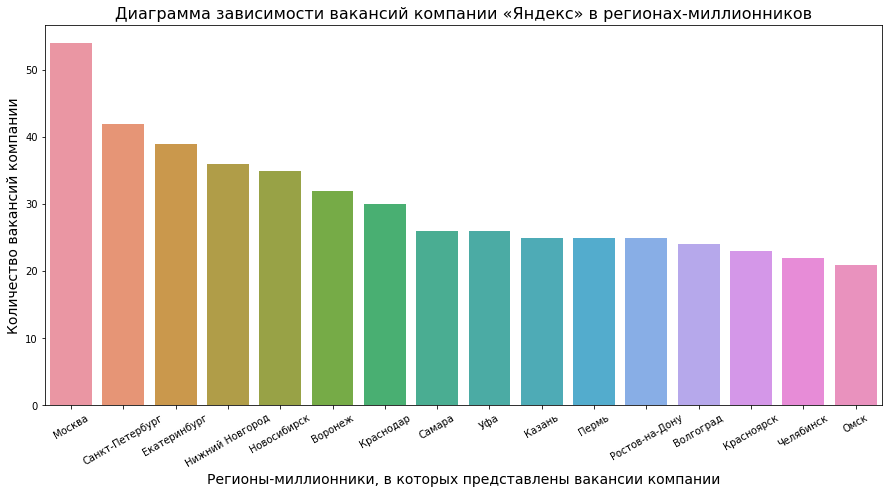

In [760]:
import seaborn as sns


fig = plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    data=grouped_data,
    x='area',
    y='cnt'    
)
barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 30)
barplot.set_ylabel('Количество вакансий компании', fontsize=14);
barplot.set_xlabel('Регионы-миллионники, в которых представлены вакансии компании', fontsize=14);
barplot.set_title('Диаграмма зависимости вакансий компании «Яндекс» в регионах-миллионников', fontsize=16);

*Анализ работодателей показывает, что крупные компании, такие как Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть и т.д находятся в лидерах по количеству вакансий. Компания Яндекс представлена в 181 регионе и является лидером по данному показателю, на 2ом месте находится Ростелеком. Также следует отметить, что у большого количества работодателей не указана сфера деятельности, данный факт затрудняет анализ, и требует дополнительного изучения этих работодателей, т.к они могут являться выбросами. При этом присутствует 1136 компаний,  у которых указано 4ре сферы деятельности. Большинство этих компаний находятся в сфере IT. Диаграмма зависимости показывает, что вакансии компании «Яндекс» представлены во всех регионах-миллионниках в большом количестве и лидирует в них Москва*   

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [1310]:
query_6_1 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_v_data /* считаем количество вакансий и задаём ей алиас cnt_v_data*/
                FROM public.VACANCIES v  /*из таблицы public.VACANCIES*/
                WHERE lower(v.name) like '%data%' or
                lower(v.name) like '%данн%' /*при условии, что вакансия имеет отношение к данным*/
'''

In [1311]:
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_v_data
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [1392]:
query_6_2 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_v_junior_ds /* считаем количество вакансий и задаём ей алиас cnt_v_junior_ds*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) and
                (lower(v.name) like '%junior%' or
                v.experience = 'Нет опыта' or
                v.employment = 'Стажировка') /*при условии, что вакансии подходят для начинающего дата-сайентиста*/
'''

In [1393]:
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_v_junior_ds
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [1390]:
query_6_3 = f''' SELECT /*выбор столбцов*/
                COUNT(*) cnt_ks_SQL_postgres /* считаем количество вакансий и задаём ей алиас cnt_ks_SQL_postgres*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) and
                (v.key_skills ilike '%postgres%' or
                v.key_skills ilike '%SQL%') /*при условии, что вакансии подходят для начинающего дата-сайентиста и в которых в качестве ключевого навыка указан SQL или postgres*/
'''

In [1391]:
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_ks_sql_postgres
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [1388]:
query_6_4 = f''' SELECT /*выбор столбцов*/
                COUNT(v.id) cnt_ks_python /* считаем количество вакансий и задаём ей алиас cnt_ks_python*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) and
                lower(v.key_skills) like '%python%' /*при условии, что вакансии подходят для начинающего дата-сайентиста, в которых в качестве ключевого навыка указан Python*/
'''

In [1389]:
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_ks_python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [1386]:
query_6_5 = f''' SELECT /*выбор столбцов*/
                ROUND(AVG(length(key_skills) - length(replace(key_skills, CHR(9), ''))+1), 2) cnt_ks /* считаем среднее количество ключевых навыков и задаём ей алиас cnt_ks*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) /*при условии, что вакансии подходят для начинающего дата-сайентиста*/
'''

In [1387]:
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_ks
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [1454]:
query_6_6 = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                v.experience, /*выбираем столбец experience*/
                ROUND(AVG(coalesce((salary_from+salary_to)/2, salary_from, salary_to)),0) /* считаем среднее значение зарплаты*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                WHERE ((salary_from is not null or
                salary_to is not null)) and
                ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) /*при условии, что вакансии подходят для начинающего дата-сайентиста*/
                GROUP by 1 /*группируем по столбцу experience*/
'''

In [1455]:
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

*Предметный анализ показал, что всего из общего количества 49197 представленных вакансий, к "данным" относится 1771 вакансий, из них подходящих вакансий для начинающего дата-сайентиста 51. При этом обладание ключевыми навыками SQL, postgres, Python в несколько раз увеличивают спрос на профессию Data Science, а в среднем в вакансиях для DS указывают не менее 6-7 ключевых навыков. Средняя зарплата специалиста без опыта работы состовляет 74643 руб, а  с опытом работы от 3 до 6ти лет 243115 руб.*

# Общий вывод по проекту

*Анализ вакансий HeadHunter показал очень большой спрос на специалистов IT, при чем данный спрос наблюдается в различных сферах деятельности(всего представлено 294). Как примет в сфере "Разработка программного обеспечения" представлено всего 3553 вакансии из общего количества вакансий 49197. Таким образом большая часть предлагаемых вакансий напрямую не связано со сферой IT. Также хотелось бы отметить, что всего количества представленных вакансий, к данным относится 1771, что показывает довольно высокий спрос на данную специализацию.
Исходя из анализа, также стоит отметить прямую зависимость предлагаемых вакансий от количества населения в городах, таким образом спрос в городах Москва и Санкт-Петербург выше чем в остальных крупных городах(см. Диаграмму зависимости количества вакансий от региона в гл.4).*

*Считаю необходимым провести дополнительное иследование вакансий DS в наиболее крупных компаниях в которых спрос на специалистов IT наибольший, таких как Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть и др.*

In [ ]:
# подведем итог исследования, обобщите выводы 
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [1537]:
query_millionaire_city = f''' SELECT DISTINCT /*выбор уникальных столбцов*/
                a.name area, /*выбираем столбец название регионов и присвоиваем алиас area*/
                COUNT(v.id) cnt /* считаем количество вакансий и задаём ей алиас cnt*/
                FROM public.VACANCIES v /*из таблицы public.VACANCIES*/
                JOIN public.areas a on a.id = v.area_id /*присоединяем таблицу public.areas с помощью оператора JOIN*/
                JOIN public.employers e on e.id = v.employer_id /*присоединяем таблицу public.EMPLOYERS с помощью оператора JOIN*/
                WHERE (e.name = 'Яндекс' or e.name = 'Ростелеком' or e.name = 'Тинькофф' or e.name = 'СБЕР' or e.name = 'Газпром нефть') and
                ((v.name ilike '%data scientist%' or
                v.name ilike '%data science%' or
                v.name ilike '%исследователь данных%' or
                v.name ilike '%machine learning%' or
                v.name ilike '%машинн%обучен%') or
                (v.name like '%ML%' and 
                v.name not like '%HTML%')) /*при условии, что выборка делается для компании «Ростелеком» и для специалистов DS*/
                GROUP by 1 /*группируем по столбцу area*/
                ORDER by 2 desc /*сортируем по возрастанию по столбцу cnt*/
'''

In [1538]:
df_millionaire_city = pd.read_sql_query(query_millionaire_city, connection)
df_millionaire_city['area'] = df_millionaire_city['area'].apply(lambda x: x if x in millionth_cities else np.nan)
df_millionaire_city = df_millionaire_city.dropna(how='any', axis=0)
grouped_data = df_millionaire_city.copy()
df_millionaire_city.loc[len(df_millionaire_city.index)] = ['Total', df_millionaire_city['cnt'].sum()]
df_millionaire_city

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt
0,Москва,32
1,Нижний Новгород,8
2,Санкт-Петербург,8
3,Новосибирск,2
4,Екатеринбург,1
5,Казань,1
6,Омск,1
7,Total,53


Text(0.5, 1.0, 'Диаграмма зависимости вакансий крупных компаний в регионах-миллионников для DS')

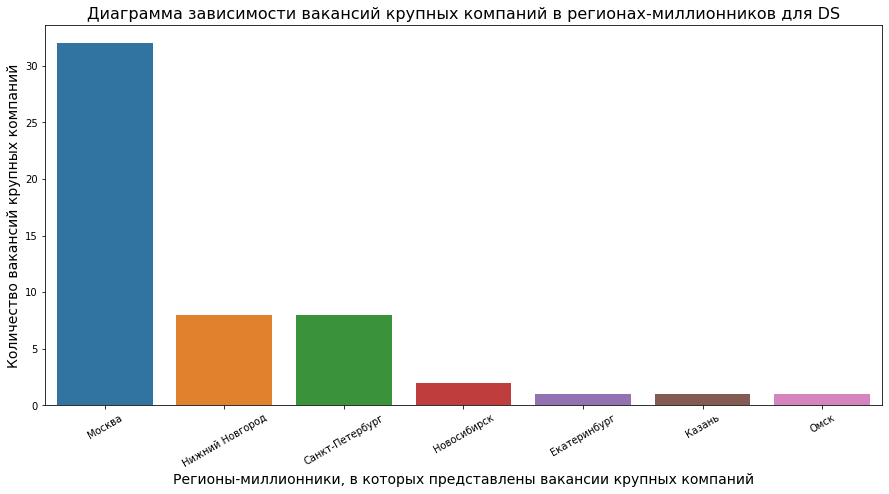

In [1542]:
import seaborn as sns


fig = plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    data=grouped_data,
    x='area',
    y='cnt'    
)
barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 30)
barplot.set_ylabel('Количество вакансий крупных компаний', fontsize=14);
barplot.set_xlabel('Регионы-миллионники, в которых представлены вакансии крупных компаний', fontsize=14);
barplot.set_title('Диаграмма зависимости вакансий крупных компаний в регионах-миллионников для DS', fontsize=16)

*Дополнительное иследование показало, что наибольший спрос на специалистов DS среди городов-миллионников наблюдается в г. Москва, остальные города значительно отстают по данному показателю*

*Считаю, что дополнительно в этих компаниях стоит произвести иследования  по предлагаемому графику работы, зарплатной вилки и др.*

*Так же считаю, важным произвести выборку количество предлагаемых вакансий в зависимости от сферы деятельности, чтобы понять в какой сфере деятельности, наибольший спрос на специалстов IT.*

In [ ]:
connection.close()